In [6]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import GridSearchCV
%config InlineBackend.figure_format = 'retina'

## Q1 Support Vector Machine

### Linear SVM

In [7]:
# 1) Load data.

X_and_Y = np.load('./arrhythmia.npy')    # Load data from file.
np.random.shuffle(X_and_Y)    # Shuffle the data.
X = X_and_Y[:, 0:279]          # First column to second last column: Features (numerical values) 
Y = X_and_Y[:, 279]    # Last column: Labels (0 or 1)
print(X.shape, Y.shape)       # Check the shapes.

(452, 279) (452,)


In [8]:
# 2) Split the dataset into 2 parts: 
#    (a) Training set + Validation set  (80% of all data points)
#    (b) Test set                       (20% of all data points)

X_train_val = X[:round(0.8*len(X)), :] # Get features from train + val set.
X_test      = X[round(0.8*len(X)):, :] # Get features from test set.     
Y_train_val = Y[:round(0.8*len(Y)),] # Get labels from train + val set.
Y_test      = Y[round(0.8*len(Y)):,] # Get labels from test set.  
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(362, 279) (90, 279) (362,) (90,)


In [9]:
# 3) Consider linear kernel. Perform grid search for best C 
#    with 3-fold cross-validation. You can use svm.SVC() for SVM
#    classifier and use GridSearchCV() to perform such grid search.
#    For more details, please refer to the sklearn documents:
#         http://scikit-learn.org/stable/modules/svm.html
#         http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

classifier = svm.SVC(kernel = "linear")
C_list     = [10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1)]# Different C to try.
Searcher = GridSearchCV(estimator = classifier, param_grid ={'C': C_list})
Searcher.fit (X_train_val, Y_train_val)
print(Searcher.cv_results_["mean_train_score"])
print(Searcher.cv_results_["mean_test_score"])

[0.56907056 0.78180332 0.85636066 0.89919756 0.95166489 0.99724518]
[0.56629834 0.73756906 0.75690608 0.72099448 0.67403315 0.66298343]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


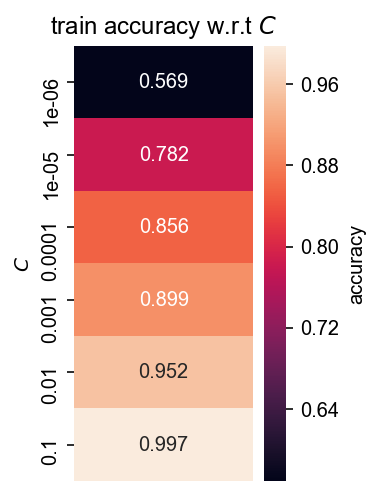

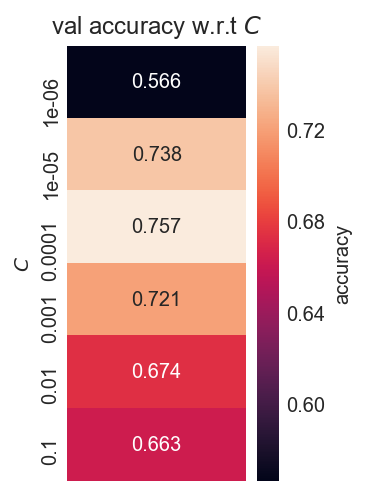

In [10]:
# 4) Draw heatmaps for result of grid search and find 
#    best C for validation set.

def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
#
# You can use the draw_heatmap_linear() to draw a heatmap to visualize 
# the accuracy w.r.t. C and gamma. Some demo code is given below as hint:
#
# demo_acc        = np.array([[0.8],
#                             [0.7]])
# demo_C_list     = [0.1, 1]
# draw_heatmap_linear(demo_acc, 'demo accuracy', demo_C_list)
#

train_acc = (np.array([Searcher.cv_results_["mean_train_score"]])).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)

val_acc = (np.array([Searcher.cv_results_["mean_test_score"]])).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [11]:
# 5) Use the best C to calculate the test accuracy.

test_acc = np.sum(Searcher.predict(X_test) != Y_test)/len(X_test)
print(test_acc)

0.26666666666666666


### SVM with RBF Kernel

In [12]:
# 1) Consider RBF kernel. Perform grid search for best C and gamma 
#    with 3-fold cross-validation. You can use svm.SVC() for SVM
#    classifier and use GridSearchCV() to perform such grid search.
#    For more details, please refer to the sklearn documents:
#         http://scikit-learn.org/stable/modules/svm.html
#         http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
classifier = svm.SVC(kernel = "rbf")
C_list     = [0.1, 1, 10, 100]#Different C to try.
gamma_list = [10**(-7),10**(-6),10**(-5),10**(-4)] # Different gamma to try.
Searcher2 = GridSearchCV(estimator = classifier, param_grid ={'C': C_list, "gamma":gamma_list})
Searcher2.fit (X_train_val, Y_train_val)
print(Searcher2.cv_results_["mean_train_score"])
print(Searcher2.cv_results_["mean_test_score"])

[0.56077181 0.56077181 0.6547615  0.56077181 0.56077181 0.65472149
 0.82733217 0.98481991 0.64367363 0.82596047 0.94477213 1.
 0.81907342 0.89642559 1.         1.        ]
[0.56077348 0.56077348 0.6160221  0.56077348 0.56077348 0.63259669
 0.77348066 0.72099448 0.6160221  0.76243094 0.75414365 0.71546961
 0.74309392 0.77348066 0.67679558 0.71546961]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


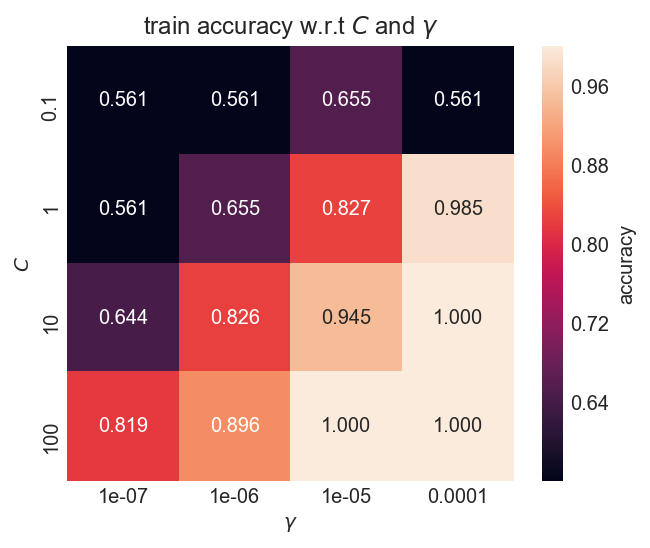

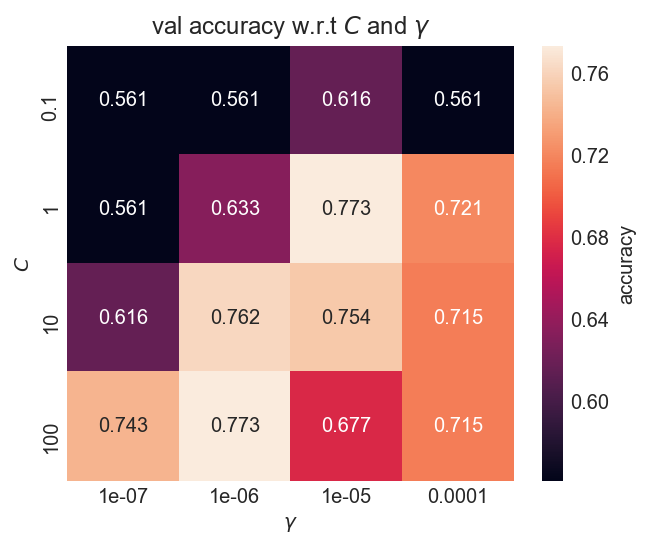

In [13]:
# 2) Draw heatmaps for result of grid search and find 
#    best C and gamma for validation set.

def draw_heatmap_RBF(acc, acc_desc, gamma_list, C_list):
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$ and $\gamma$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
#
# You can use the draw_heatmap_RBF() to draw a heatmap to visualize 
# the accuracy w.r.t. C and gamma. Some demo code is given below as hint:
#
# demo_acc        = np.array([[0.8, 0.7],
#                             [0.7, 0.9]])
# demo_C_list     = [0.1, 1]
# demo_gamma_list = [0.01, 0.1]
# draw_heatmap_RBF(demo_acc, 'demo accuracy', demo_gamma_list, demo_C_list)
#

train_acc = (np.array([Searcher2.cv_results_["mean_train_score"]])).reshape(-1,4)
draw_heatmap_RBF(train_acc, 'train accuracy', gamma_list, C_list)

val_acc   = (np.array([Searcher2.cv_results_["mean_test_score"]])).reshape(-1,4)
draw_heatmap_RBF(val_acc, 'val accuracy',gamma_list, C_list)

In [14]:
# 3) Use the best C and gamma to calculate the test accuracy.

test_acc = np.sum(Searcher2.predict(X_test) != Y_test)/len(X_test)
print(test_acc)

0.2777777777777778


### Re-implementation of Cross-validation and Grid Search 

In [15]:
# 1) Implement a simple cross-validation.
import math
def simple_cross_validation(X_train_val, Y_train_val, C, gamma, fold):
    """
    A simple cross-validation function.
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C:           Parameter C for SVM.
    gamma:       Parameter gamma for SVM.
    fold:        The number of folds to do the cross-validation.
    
    Return the average accuracy on validation set.
    """
    val_acc_list = []
    train_acc_list = []
    bottom = 0
    top = X_train_val.shape[0]
    fold_size = math.floor(X_train_val.shape[0]/fold)
    for i in range(fold):
        classifier = svm.SVC(C = C, kernel = 'rbf', gamma = gamma)
        classifier.fit(X_train_val[np.r_[0:bottom , (bottom +fold_size):top], :], Y_train_val\
        [np.r_[0:bottom, (bottom+fold_size):top]])
        train_pred = classifier.predict(X_train_val[np.r_[0:bottom, (bottom+fold_size): top] , :])
        test_pred = classifier.predict(X_train_val[bottom:(bottom+fold_size),:])
        train_correct = np.equal(train_pred, Y_train_val[np.r_[0:bottom, (bottom + fold_size):top]]).astype(int)
        test_correct = np.equal(test_pred , Y_train_val[bottom:(bottom+fold_size)]).astype(int)
        val_acc_list.append(np.sum(test_correct)/test_correct.shape[0])
        train_acc_list.append(np.sum(train_correct)/train_correct.shape[0])
        bottom += fold_size
        
    return sum(val_acc_list) / len(val_acc_list), \
           sum(train_acc_list) / len(train_acc_list)

In [16]:
# 2) Implement the grid search function. 
def simple_GridSearchCV_fit(X_train_val, Y_train_val, C_list, gamma_list, fold):
    """
    A simple grid search function for C and gamma with cross-validation. 
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C_list:      The list of C values to try.
    gamma_list:  The list of gamma values to try.
    fold:        The number of folds to do the cross-validation.
    
    Return the val and train accuracy matrix of cross-validation. 
    All combinations of C and gamma are
    included in the matrix. Shape: (len(C_list), len(gamma_list))
    """
    val_acc_matrix   = np.empty((len(C_list), len(gamma_list)))
    train_acc_matrix = np.empty((len(C_list), len(gamma_list)))
    for C in range(len(C_list)):
        for gamma in range(len(gamma_list)):
            val_acc_matrix[C, gamma], train_acc_matrix[C, gamma] = \
            simple_cross_validation(X_train_val, Y_train_val, C_list[C], gamma_list[gamma], fold)
    return val_acc_matrix, train_acc_matrix

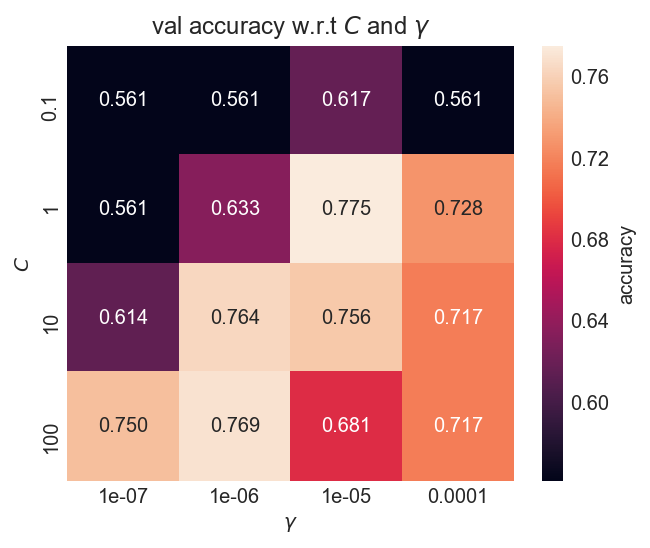

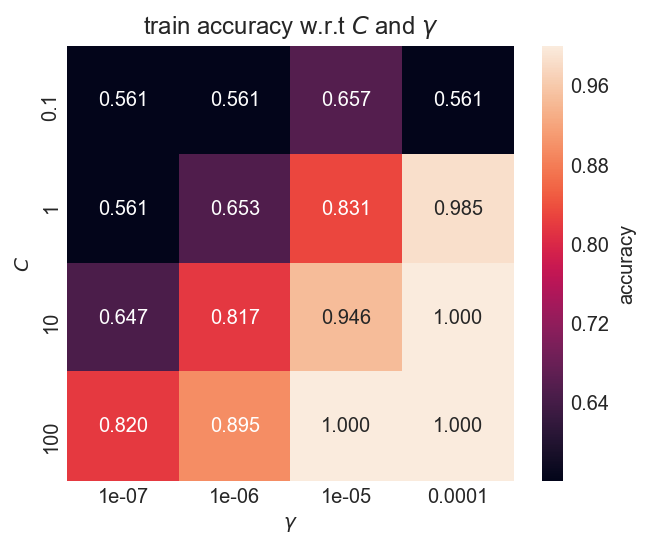

In [17]:
# 3) Perform grid search with 3-fold cross-validation.
#    Draw heatmaps for result of grid search and find 
#    best C and gamma for validation set.
val_acc_matrix, train_acc_matrix = \
    simple_GridSearchCV_fit(X_train_val, Y_train_val, C_list, gamma_list, 3)

draw_heatmap_RBF(val_acc_matrix, 'val accuracy', gamma_list, C_list)
draw_heatmap_RBF(train_acc_matrix, 'train accuracy', gamma_list, C_list)